# 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설 검정

# 3. 라이브러리 로드
- 분석에 사용할 pandas
- 수치계산에 사용할 numpy
- 시각화에 사용할 seaborn


#### 구 버전의 주피터 노트북에서는 %matplotlib inline 설정 해야함

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 한글 폰트 설정

In [2]:
# 그래프에서 글자 깨짐 방지 위한 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을통해 글씨를 더 선명하게 만들고, 폰트 주변 흐릿한 효과 방지
%config InlineBackend.figure_format = 'retina'

# 5. 데이터 불러오기
- 국민 건강 보험 공단_ 건강 검진정보 csv파일
- url : https://www.data.go.kr/data/15007122/fileData.do
- 소개: 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.

In [3]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어오기, encoding = cp949 (한글)
# 파일을 읽어온 후 shape로 행과 열의 수를 출력
data = pd.read_csv('data/국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949')
data.shape

(1000000, 34)

# 5.1 데이터 미리보기

In [4]:
# sample, head, tail을 통해 데이터를 미리보기
data.head()
data.tail()
data.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
838415,2019,838416,41,1,10,170,65,82.6,1.2,1.0,...,17.0,1.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231


# 6. 기본정보보기

In [5]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [6]:
# 데이터가 너무 많기 때문에 column 불러오기
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [7]:
# dtypes를 통해 데이터 형식만 출력
data.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

#### Part1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
- 라이브러리 로드 및 한글 폰트 설정
- 데이터셋 소개와 로드
----

# part2. 데이터 그룹화와 연산하기
# 7. 결측치 보기

In [11]:
# isnull을 통해 결측치를 bool(0 or 1 , 결측치 일 경우 1) 값으로 표시하고 sum으로 컬럼마다의 결측치 수를 셀 수 있다.
df = data
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [54]:
# isna로도 결측치 여부를 확인하고 sum으로 결측치를 셀 수 있다.
df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

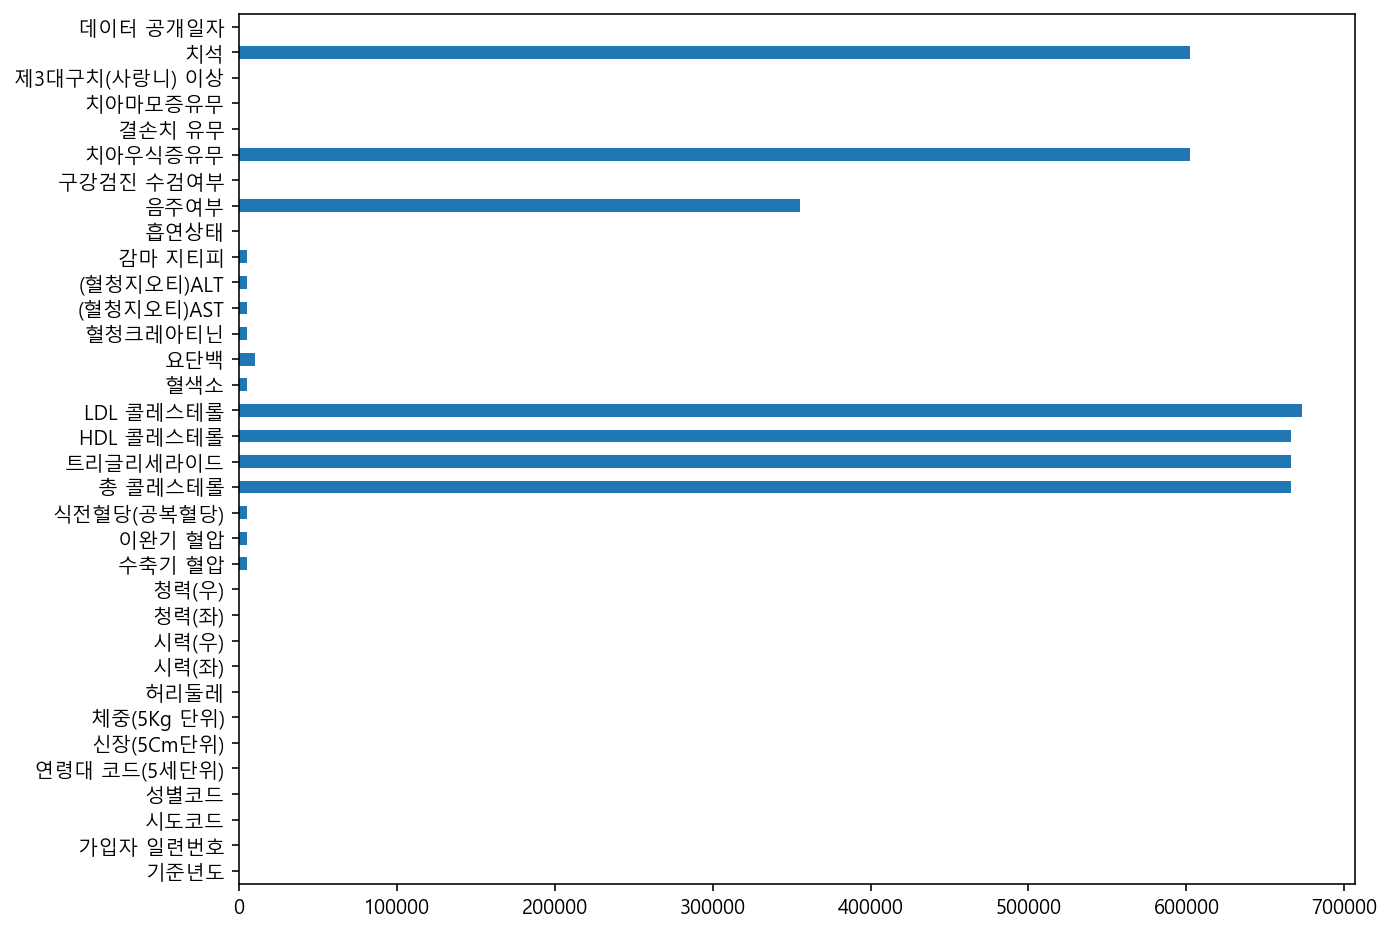

In [21]:
# 판다스에 내장 된 plot을 통해 컬럼별 결측치 수를 시각화할 수 있다.
# df.isnull().sum().plot()
df.isnull().sum().plot.barh(figsize=(10,8))

# 8. 일부 데이터 요약하기

In [23]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [27]:
# 여럭 컬럼 가져오기
# '(혈청지오티)AST', '(혈청지오티)ALT' 가져와 미리보기
df[['(혈청지오티)AST', '(혈청지오티)ALT']]
df[['(혈청지오티)AST', '(혈청지오티)ALT']].info()
df[['(혈청지오티)AST', '(혈청지오티)ALT']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)AST  994478 non-null  float64
 1   (혈청지오티)ALT  994477 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


,(혈청지오티)AST,(혈청지오티)ALT
count,994478.000000,994477.000000
mean,26.231107,25.996708
std,24.046478,27.710895
min,1.000000,1.000000
25%,19.000000,15.000000
50%,23.000000,20.000000
75%,29.000000,30.000000
max,7362.000000,6435.000000


# 9. value_counts로 값 집계하기

In [31]:
# value_counts를 통해 성별코드로 그룹화 하고 개수를 집계
df['성별코드'].value_counts()

1    519574
2    480426
Name: 성별코드, dtype: int64

In [34]:
# value_counts를 통해 흡연상태로 그룹화 하고 개수를 집계
df.columns
df['흡연상태'].value_counts()
# 1.0 : 흡연 / 2.0 : 비흡연

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

# 10. groupby와 pivot_table 사용하기
## 10.1 goupby

In [52]:
# groupby를 통해 데이터를 그룹화한다.
# 성별코드로 그룹화 한 데이터를 세어봅니다.

# df.groupby(['성별코드']).count() # 1: 남성, 2: 여성
df.groupby(['성별코드'])['가입자 일련번호'].count() 

음주여부
0.0        18
1.0    644900
Name: 가입자 일련번호, dtype: int64

In [56]:
# 성별코드와 음주여부로 그룹화 한 데이터를 세어봅니다.
print(len(df)-df['음주여부'].isna().sum())  # 음주여부 답변 개수
df.groupby(['성별코드','음주여부'])['가입자 일련번호'].count() 

644918


성별코드  음주여부
1     0.0          7
      1.0     401249
2     0.0         11
      1.0     243651
Name: 가입자 일련번호, dtype: int64

In [58]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구한다.

df.groupby(['성별코드','음주여부'])['감마 지티피'].mean()

성별코드  음주여부
1     0.0     26.000000
      1.0     52.159757
2     0.0     27.000000
      1.0     23.565117
Name: 감마 지티피, dtype: float64

In [60]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의  요약수치를 구한다.

df.groupby(['성별코드','음주여부'])['감마 지티피'].describe().transpose()

성별코드           1                         2               
음주여부         0.0            1.0        0.0            1.0
count   7.000000  400496.000000  11.000000  243215.000000
mean   26.000000      52.159757  27.000000      23.565117
std    12.897028      62.807391  15.968719      31.881879
min    10.000000       1.000000   5.000000       1.000000
25%    18.500000      22.000000  16.500000      13.000000
50%    21.000000      34.000000  20.000000      16.000000
75%    34.000000      58.000000  40.500000      24.000000
max    46.000000     999.000000  53.000000     999.000000

In [63]:
# agg을 사용하면 선택한 수치를 함께 구할 수 있다.
df.groupby(['성별코드','음주여부'])['감마 지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0        7  26.000000    21.0
     1.0   400496  52.159757    34.0
2    0.0       11  27.000000    20.0
     1.0   243215  23.565117    16.0

# 10.2 Pivot_table

In [70]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구한다.
df.pivot_table(index='음주여부',values ='가입자 일련번호',aggfunc='count')

,가입자 일련번호
음주여부,
0.0,18
1.0,644900


In [78]:
# 음주여부에 따른 감마지티피의 평균을 구한다.
pd.pivot_table(df, index= '음주여부', values ='감마 지티피' )

,감마 지티피
음주여부,
0.0,26.611111
1.0,41.355770


In [77]:
# aggfunc에 여러 값을 한번에 지정할 수도 있다.
pd.pivot_table(df, index= '음주여부', values ='감마 지티피',aggfunc=['mean','median'] )

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,26.611111,20.5
1.0,41.355770,26.0


In [79]:
# aggfunc에 describe를 사용해 통계 요약값을 한번에 볼 수도 있다.
pd.pivot_table(df, index= '음주여부', values ='감마 지티피',aggfunc='describe' )

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,17.25,20.5,39.5,18.0,53.0,26.611111,5.0,14.455363
1.0,17.00,26.0,45.0,643711.0,999.0,41.355770,1.0,55.050548


In [80]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구할 수 있다.
pd.pivot_table(df, index= ['음주여부','성별코드'], values ='감마 지티피',aggfunc='describe' )

25%   50%   75%     count    max       mean   min        std
음주여부 성별코드                                                               
0.0  1     18.5  21.0  34.0       7.0   46.0  26.000000  10.0  12.897028
     2     16.5  20.0  40.5      11.0   53.0  27.000000   5.0  15.968719
1.0  1     22.0  34.0  58.0  400496.0  999.0  52.159757   1.0  62.807391
     2     13.0  16.0  24.0  243215.0  999.0  23.565117   1.0  31.881879

#### Part2. 데이터 그룹화와 연산하기
- 로드한 데이터의 결측치를 보고 요약, 집계하기 - info, isnull, value_counts
- groupBy와 pivot_table로 다양한 집계 연산 하기
----